In [1]:
%matplotlib inline
from sklearn import datasets, cross_validation
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import mondrianforest
import warnings
warnings.filterwarnings('ignore')

In [2]:
# prepare dataset and classifier
X, y = datasets.make_moons(noise=0.2, random_state=0)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=.4)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1), np.arange(y_min, y_max, .1))

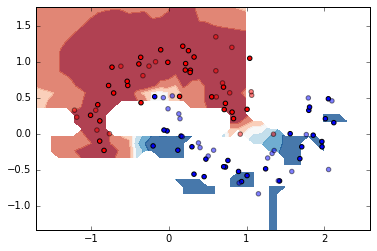

In [3]:
# plot
cm = plt.cm.RdBu
cm_bright = colors.ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, 1, 1)
clf = mondrianforest.MondrianForestClassifier(n_tree=10)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.5)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

plt.show()